<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h3 align="center">Dr. Amiri</h4>
<h4 align="center">Sharif University of Technology, Fall 2023</h4>
<h4 align="center">Python Assignment</h4>
<h5 align="center"><font color="cyan"> Feel free to contact TA team for any possible questions about the assignment </font>
 </h5>
<h5 align="center"> <font color="cyan"> Questions 1,2: @Ilia_ad7  -  Question 3: @MhShafieizadegan </font> </h5>

You should write your code in the <font color='green'>Code Cell</font> and then run the <font color='green'>Evaluation Cell</font> to check the correctness of your code.<br>
<font color='red'>**Please do not edit the codes in the Evaluation Cells.**</font>

## 1. Prediction with Least Squares
* Fit a polynomial of degree $K$ to all columns of the following dataset
to predict number of "Cars" and "Buses" in the years of $2016$,$2017$,$2018$,$2019$ and $2020$.


$$
y_i = \sum_{k=0}^K w_k x_{i}^k + \epsilon_i
$$


Change the value of $K$ from 3 to 5. For each degree, plot the data and your model fit and compare the results.

``(25 pt.)``

In [1458]:
# import required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as pch

In [1459]:
# Code cell
def leastSquares(df,columns, K, lastPredictedYear):
    # Declares an array from the dataframe
    arr = df.to_numpy()
    
    # Declares the first year, the last year, the duration
    firstYear = arr[0,0].astype(int)
    firstPredictedYear = arr[len(arr)-1,0].astype(int) + 1
    duration = lastPredictedYear - arr[0,0].astype(int) + 1
    predictedDuration = lastPredictedYear - firstPredictedYear + 1
    
    # Declares the predictedYears
    predictedYears = np.linspace(firstPredictedYear,lastPredictedYear,predictedDuration)
    
    # Declares the time
    t = np.transpose(arr[:,0])
    tPredict = np.linspace(firstYear, lastPredictedYear, duration)
    
    # Declares the size of the figure anf the image index for the subplot
    plt.figure(figsize=(8,10))
    imageIndex = 1
    
    for i in range(len(K)):
        # Gets the dimensions of the array
        m = len(arr)
        n = K[i] + 1
        
        # Declares matrix A
        A = np.zeros([m,n])
        for j in range(n):
            A[:,j] = pow(arr[:,0]-arr[0,0],j)
        
        # Declares the dataframe 
        predicteddata = {"Year": predictedYears}
        predictedDataframe = pd.DataFrame(predicteddata)
        
        for j in range(len(columns)):
            # Declares matrix b
            b = df.loc[:, columns[j]].to_numpy()
            
            # Calculates the polynomial coefficients
            x = np.linalg.inv(np.transpose(A) @ A) @ (np.transpose(A) @ b)
        
            # Declares the polynomial
            # The order is reversed
            poly = np.poly1d(x[::-1])
            
            # Declares the polynomial
            f = poly(tPredict - firstYear)
            
            # Saves the results
            predicted = poly(predictedYears - firstYear)
            predictedDataframe[columns[j]] = predicted
            
            # Declares a subplot
            plt.subplot(len(K), len(columns), imageIndex)
            
            # Plots the real values and the predicted values
            plt.plot(tPredict, f, marker = 'o')
            plt.plot(t, b, marker = 'o')
            
            # Declares the labels and the title
            plt.xlabel("Year")
            plt.ylabel(columns[j])
            plt.title("Predicting values of " 
                      + columns[j] 
                      + " column \n using a polynomial of degree " 
                      + K[i].astype(str))
            
            # Increases the image index
            imageIndex += 1 
            
        # Prints the results
        print("Predicted values for K = " + K[i].astype(str) + ":")
        display(predictedDataframe)          
        
    # Prevents overlapping
    plt.tight_layout()
    
    # Shows the image
    plt.show()

Predicted values for K = 3:


,Year,Car,Bus
0,2016.0,1.079113e+07,250684.753547
1,2017.0,1.135646e+07,260030.129904
2,2018.0,1.194129e+07,269525.793520
3,2019.0,1.254596e+07,279169.842333
4,2020.0,1.317080e+07,288960.374284


Predicted values for K = 4:


,Year,Car,Bus
0,2016.0,1.085577e+07,235522.286141
1,2017.0,1.144644e+07,238921.596848
2,2018.0,1.206102e+07,241442.068066
3,2019.0,1.270020e+07,242991.182802
4,2020.0,1.336472e+07,243473.067952


Predicted values for K = 5:


,Year,Car,Bus
0,2016.0,1.124644e+07,216376.739897
1,2017.0,1.206693e+07,208513.964591
2,2018.0,1.297318e+07,196740.249717
3,2019.0,1.397525e+07,180505.402796
4,2020.0,1.508399e+07,159217.735619


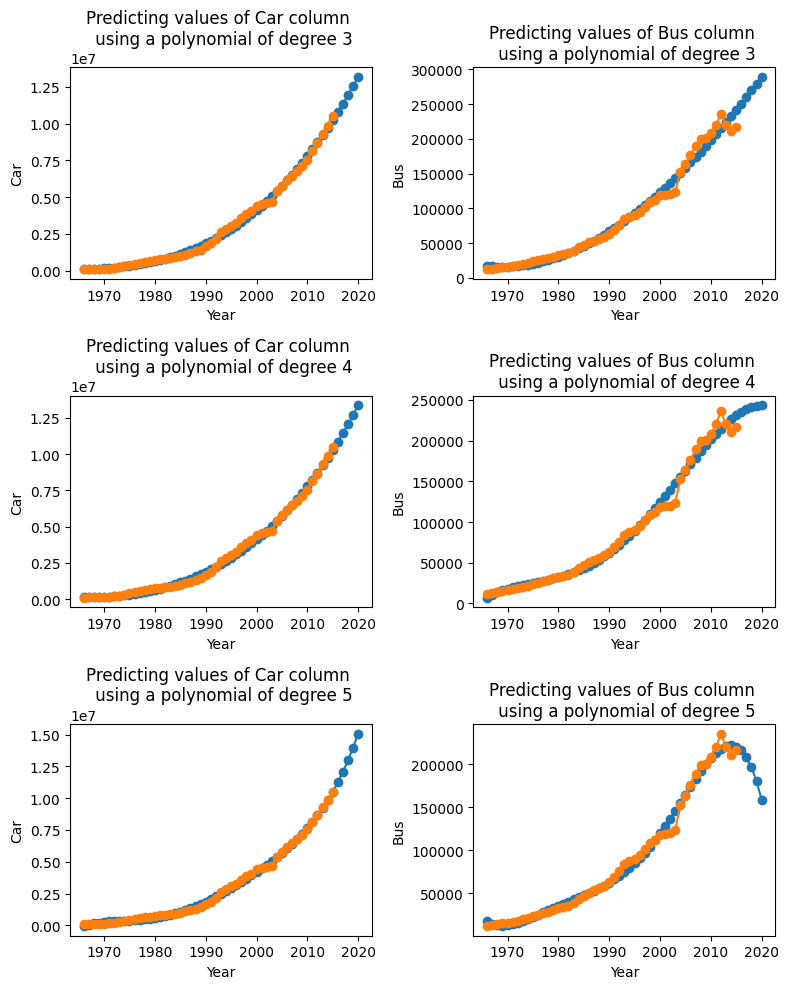

In [1460]:
# Evaluation Cell
# Gets the dataframe
df = pd.read_csv("arac.csv", sep=";")

# Declares the columns and values of K and the final year to predict
columns = np.array(["Car","Bus"])
K = np.array([3,4,5])
lastPredictedYear = 2020

leastSquares(df, columns, K, lastPredictedYear)

## 2. KMeans Clustering (LSE approach)

You are given a dataset of **600** points in a **2-dimensional** space, which have come from **3 different distributions**. The dataset is stored in a file called **Image.csv**, which has two columns: **x** and **y**. You want to use **K-means** to cluster the data points into **K** groups, and analyze the results.

- Part 1: Write a Python function called **load_data** that takes the file name **Image.csv** as an input and returns a numpy array **X**. **X** should be a **600 by 2** matrix, where each row is a point in the 2-dimensional space. ``(5 pt.)``

In [1461]:
def load_data(file_name):
    # Gets the dataframe
    df = pd.read_csv(file_name)
    
    # Declares an array from the dataframe
    X = df.to_numpy()
    return X

- Part 2: Write a Python function called **kmeans** that takes **X** and **K** as inputs and returns two numpy arrays: **M** and **U**. Use the **K-means(LSE approach)** algorithm as described below to find the optimal cluster centroids and assignments. ``(15 pt.)``

The general approach of the k-means clustering algorithm is as follows:

- The algorithm takes two inputs: the data matrix X of size n by d, where n is the number of data points and d is the dimension of each data point, and the number of clusters K.
- The algorithm outputs two matrices: the cluster centroid matrix M of size K by d, where each row represents the coordinates of a cluster center, and the cluster assignment matrix U of size n by K, where each row represents the membership of a data point to a cluster.
- The algorithm works by first initializing the M matrix randomly from the data points in X; and then iteratively updating the cluster centroids and the cluster assignments until convergence, which means that the total squared error between the data points and their assigned cluster centroids does not change.
- The algorithm uses the least squares error (LSE) method to measure the quality of the clustering. The LSE method is a way of quantifying how well the cluster centroids fit the data points, by minimizing the sum of the squared distances between each data point and its assigned cluster centroid. The LSE method is used in both steps of the algorithm: assigning the data points to the nearest cluster centroid, and updating the cluster centroids as the mean of the assigned data points.


In [1462]:
def kmeans(X, K):
    # Declares the number of points
    n = len(X)
    
    # Declares the dimension
    d = len(X[0])
    
    # Declares M
    M = np.zeros([K,d])
    randomIndex = np.random.randint(n, size=K)
    M = X[randomIndex,:]
    
    # Declares U
    U = np.zeros([n,K])
    
    # Declares MSE
    LSE = np.zeros([1,K])
    
    # Updates centers until the LSE converges
    while(True):
        # Creates a copy of LSE
        initialMSE = LSE.copy()
        
        # For each point, finds the closest center
        for i in range(n):
            # Defines the square error
            SE = np.linalg.norm(M - X[i], axis=1)
            
            # Gets the index of minimum error
            minIndex = SE.argmin()
            
            # Changes U
            U[i,:] = 0
            U[i,minIndex] = 1
                
        # For each cluster, calculates the MSE
        for i in range(K):
            # Finds the points of the cluster
            indexes = np.where(U[:,i]==1)[0]
            
            # Changes the center to the mean of the points in a cluster
            M[i] = np.mean(X[indexes], axis=0)
            
            # Calculates the LSE
            LSE[0,i] = np.min(pow(np.linalg.norm(M[i] - X[indexes], axis=1),2))
            
        # Checks if the LSE has changed
        if np.array_equal(initialMSE,LSE):
            break
        
    return M, U

- Part 3: Write a Python function called **plot_clusters** that takes **X**, **M**, and **U** as inputs and plots the data points and the centroids on a 2-dimensional plane. Use different colors and markers for the different clusters, and draw a circle around each centroid. Label the axes as **x** and **y**, and add a title and a legend to the plot. ``(10 pt.)``

In [1463]:
def plot_clusters(X, M, U):
    K = np.int32(len(M))

    # Declare an array of colors as strings
    dataColors = np.array(["palevioletred", "mediumpurple", "deepskyblue", "lightgreen", "gold"])
    centerColors = np.array(["crimson", "midnightblue", "mediumblue", "green", "darkgoldenrod"])

    # Declare an array of markers as characters
    markers = np.array(["*", "x", "+", "o", "s"])

    # For every cluster
    for i in range(K):
        # Declares the cluster indexes
        indexes = np.where(U[:,i]==1)[0]
        
        # Plots the points
        plt.plot(X[indexes,0],X[indexes,1], markers[i], c=dataColors[i])
        plt.plot(M[i,0],M[i,1],markers[i], c=centerColors[i])

        # Declares the radius
        radius = np.max(np.linalg.norm(M[i] - X[indexes], axis=1)) + 0.3
        
        # Plots a circle around the points
        circle = pch.Circle((M[i,0], M[i,1]), radius=radius, color=dataColors[i], fill=False)
        plt.gca().add_patch(circle)

    # Declares the labels and title
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title(K.astype(str) + " clusters")
    
    # Plots the figure
    plt.show()


**<font color="red"> Don't edit the code in the following cell!</font>**

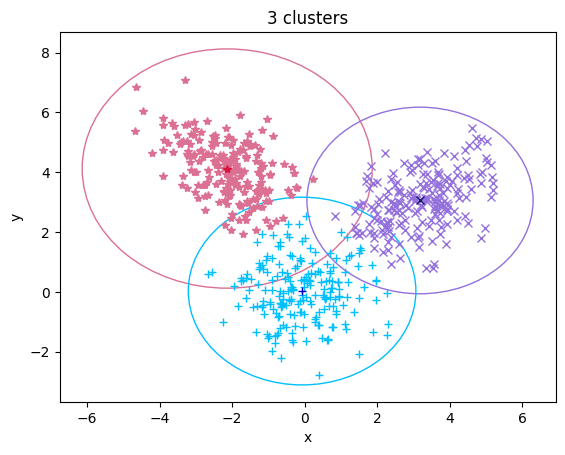

In [1464]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')
# Set the value of K
K = 3
# Cluster the data using K-means
M, U = kmeans(X, K)
# Plot the data and the centroids
plot_clusters(X, M, U)

 Analyze the results of the K-means-LSE clustering. How well do they match the underlying distributions? What are the advantages and disadvantages of this method? ``(5 pt.)``

K-means-LSE clustering is a variant of k-means clustering that uses the least squares error (LSE) criterion instead of the sum of squared errors (SSE) criterion. This means that it minimizes the sum of squared distances from each point to its assigned cluster center, weighted by the inverse of the point's variance. This makes it more robust to outliers and noise than the standard k-means algorithm¹.

The results of K-means-LSE clustering depend on the choice of k, the number of clusters, and the initial cluster centers. If k is not equal to the true number of clusters in the data, then the algorithm may produce poor results that do not match the underlying distributions. For example, if k is too small, then the algorithm may merge distinct clusters into one, and if k is too large, then the algorithm may split a single cluster into multiple ones. Therefore, it is important to use some methods to determine the optimal value of k, such as the elbow method, the silhouette method, or the gap statistic.

The advantages of K-means-LSE clustering are that it is simple, fast, and easy to implement. It can also handle large datasets and high-dimensional data. The disadvantages are that it is sensitive to the initial cluster centers, which are usually chosen randomly, and that it may converge to a local minimum rather than a global minimum. It also assumes that the clusters are spherical and have equal variances, which may not be true for some datasets.

- Part 4: Write a Python function called **elbow_method** that takes **X** and a list of possible values for **K** as inputs and returns a numpy vector **S** of the same size as the list. **S** should contain the **sum of squared errors (SSE)** for each value of **K**, where the SSE is defined as the sum of the squared distances between each point and its assigned centroid. Plot **S** versus **K** and use the **elbow method** to find the best value of **K** for the data. Explain your reasoning and show your work. ``(15 pt.)``

In [1465]:
def elbow_method(X, K_list):
    # Declares the number of points
    n = len(X)
    
    # Declares the dimension
    d = len(X[0])
    
    # Declares the number of Ks
    Knum = len(K_list)
    
    # Declares S
    S = np.zeros([Knum,1])
    
    # For each K, calculates the SSE
    for K in range(Knum):
        # Cluster the data using K-means
        M, U = kmeans(X, K_list[K])
        
        # For each cluster, calculates S
        for i in range(K_list[K]):
            # Finds the points of the cluster
            indexes = np.where(U[:,i]==1)[0]

            # Calculates the SSE
            S[K,0] += np.sum(pow(np.linalg.norm(M[i] - X[indexes], axis=1),2))
    
    return S

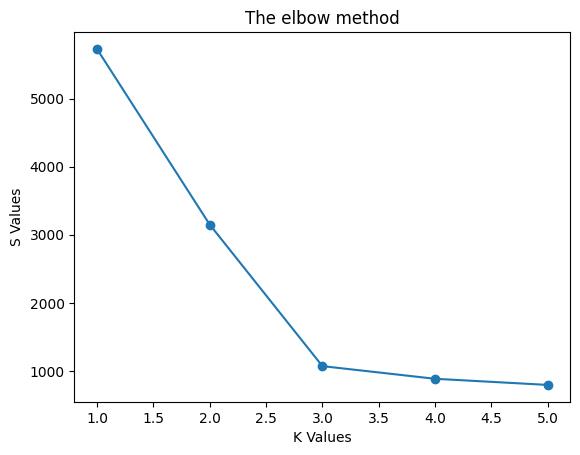

In [1466]:
# Evaluation Cell

# Load the data from the file
X = load_data('Image.csv')

# Set the values of K
K_list = np.array([1, 2, 3, 4, 5])

# Declares S
S = elbow_method(X,K_list)

# Plots S
plt.plot(K_list, S, marker='o')

# Declares the labels and the title
plt.xlabel("K Values")
plt.ylabel("S Values")
plt.title("The elbow method")

# Shows the figure
plt.show()

The elbow method is a technique that helps you choose the optimal number of clusters for a data set when using k-means clustering. The idea is to plot the within-cluster
sum of squares (WCSS) against the number of clusters (k), and look for the point where the curve bends sharply, forming an elbow-like shape. This point corresponds to
the number of clusters that best fit the data, as adding more clusters beyond that point does not improve the model significantly.
According to the figure, the number of clusters that best fit the data is 3.

# 3. Sentiment Analysis using Linear Regression

### Introduction
Sentiment analysis is a technique used to determine the sentiment or opinion expressed in text data. In this assignment, we will explore the application of linear regression for sentiment analysis on a dataset of movies reviews. The goal is to build a model that can predict the sentiment score of new text documents based on the extracted features.

**Note: In this question, feel free to use built-in functions implemented in different python packages. One of the goals of this question is to make you familiar with using built-in functions in python**

### Import required packages and libraries

Make sure you have installed all of the following packages before.

Use the following command in terminal for installing packages.
```
pip install [package_name]
```

In [1467]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import string

### Load and Inspect the Dataset

Load the "sentiment.csv" dataset and follow the instructions below:
1. Display the first 25 rows and its last 10 rows of the dataset.
2. Print the information about all columns of data frame.
3. plot the histogram of the sentiments scores.

``(5 pt.)``

In [1468]:
# Gets the dataframe
df = pd.read_csv("sentiment.csv")
    
# Declares an array from the dataframe
arr = df.to_numpy()

# Display the first 25 rows of the dataset
display(df.loc[0:24, :])

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
5,6,1,of escapades demonstrating the adage that what...,2
6,7,1,of,2
7,8,1,escapades demonstrating the adage that what is...,2
8,9,1,escapades,2
9,10,1,demonstrating the adage that what is good for ...,2


In [1469]:
# Displays the last 10 rows of the dataset
display(df.loc[len(df)-10:len(df), :])

,PhraseId,SentenceId,Phrase,Sentiment
9990,9991,419,this a comedy or serious drama,2
9991,9992,419,a comedy or serious drama,2
9992,9993,419,a comedy or,2
9993,9994,419,a comedy,2
9994,9995,419,serious drama,2
9995,9996,420,plays like some corny television production fr...,1
9996,9997,420,plays like some corny television,1
9997,9998,420,like some corny television,2
9998,9999,420,some corny television,1
9999,10000,420,corny television,1


In [1470]:
# Prints the information of columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PhraseId    10000 non-null  int64 
 1   SentenceId  10000 non-null  int64 
 2   Phrase      10000 non-null  object
 3   Sentiment   10000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 312.6+ KB


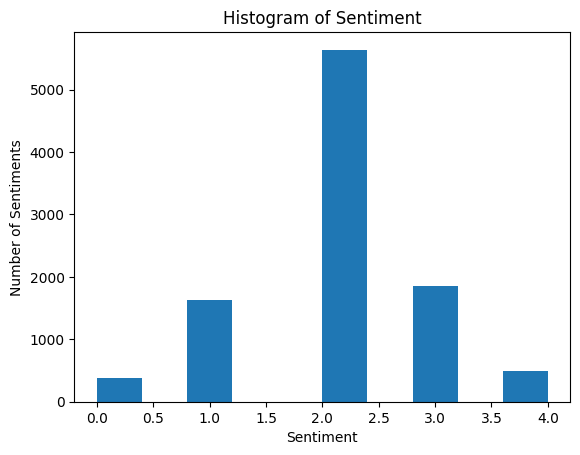

In [1471]:
# histogram of sentiment scores
# Defines the array of Sentiment column
sentiment = df.loc[:, "Sentiment"].to_numpy()

# Plots the histogram
plt.hist(sentiment)

# Defines the labels and the title
plt.xlabel("Sentiment")
plt.ylabel("Number of Sentiments")
plt.title("Histogram of Sentiment")

# Shows the figure
plt.show()

Each sample contains a sentence or phrase which is a review comment about a movie, with is corresponding sentiment score which can be the following:
- 0 : negative
- 1 : somehow negative
- 2 : neutral
- 3 : somehow positive
- 4 : positive

### Preprocess the text data
In order to prepare our text data for regression analysis, we have to follow these steps:
1. Convert all text and words into lowercase
2. Removing punctuation marks such as exclamation marks, question marks, etc.
3. Creating a list of stop-words. Stop words are words that are frequently used in a language but typically do not carry significant meaning or contribute much to the sentiment of a sentence e.g. 'and', 'the', 'is', etc. **(Hint: use "re" package)**
4. Break down the text into individual words or tokens. Tokenization is a fundamental step that helps in analyzing the text at a granular level.

Comlpete the **"preprocess_text(text)"** function on the following code cell.

``(5 pt.)``

In [1472]:
def preprocess_text(text):
    # Lowercases the text
    text = text.lower()

    # Removes puncutations
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Declares the stop words
    stop_words = stopwords.words('english')
    
    # Splits the text
    tokens = re.split("\s+", text)
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Joins the filterized words
    text = ' '.join(filtered_tokens)

    return text

In [1473]:
# Declares the dataframe
df = pd.read_csv("sentiment.csv")
phrase = df.loc[:, 'Phrase']

# Applys the preprocessing function to the text column
phrase = phrase.apply(preprocess_text)

### Feature extraction
Feature extraction involves converting the processed text data into a format suitable for input to a machine learning model. The goal is to represent the text data in a way that captures relevant information for sentiment analysis.

Surf the net for the **"Bag-of-Words" (BoW)** technique. In a markdown cell explain this method and discuss how python built-in functions implement it.

Based on what you learned, extract the features.

``(10 pt.)``

## <font color="red"> TODO : discuss BoW method </font>

...

The **Bag-of-Words (BoW)** technique is a simple way to represent text data for machine learning. It involves two steps:

- Creating a **vocabulary** of all the unique words in the text data.
- Converting each text document into a **vector** of word counts or frequencies based on the vocabulary.

The BoW technique ignores the order and structure of the words in the text, but it can capture the occurrence and importance of the words.

In Python, you can use the `CountVectorizer` class from the `sklearn.feature_extraction.text` module to implement the BoW technique. The `CountVectorizer` class has the following methods:

- `fit_transform(text)`: This method takes a list of text documents as input and returns a sparse matrix of word counts or frequencies. It also creates the vocabulary based on the input text.
- `get_feature_names_out()`: This method returns the vocabulary as a list of feature names (words).

To use the BoW representation for sentiment analysis, you can use the `train_test_split` function from the `sklearn.model_selection` module to split the data into training and testing sets. Then, you can use the `LinearRegression` class from the `sklearn.linear_model` module to train a linear regression model on the training data. The `LinearRegression` class has the following methods:

- `fit(X, y)`: This method takes the input features (X) and the output labels (y) as arguments and fits the linear regression model to the data.
- `predict(X)`: This method takes the input features (X) as an argument and returns the predicted output labels (y) based on the fitted model.

In [1474]:
# Instantiate the class
vectorizer = CountVectorizer()

# Fit and transform the Phrase column
X = vectorizer.fit_transform(phrase)

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

### Regression model

1. Split the dataset into training and testing sets using an appropriate ratio.
2. Train and fit a linear regression model to the train data
3. Evaluate the model's performance on the testing set. Calculate suitable evaluation metrics, such as mean squared error (MSE) 

**Note: Feel free to use built-in functions for this section**

``(5 pt.)``

In [1475]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.2, random_state=0)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean squared error: {mse:.4f}')


Mean squared error: 0.4259


### Visualization

Visualize and scatter plot the actual vs. predicted sentiment scores for the model. Briefly interpret the results in a markdown cell.

``(5 pt.)``

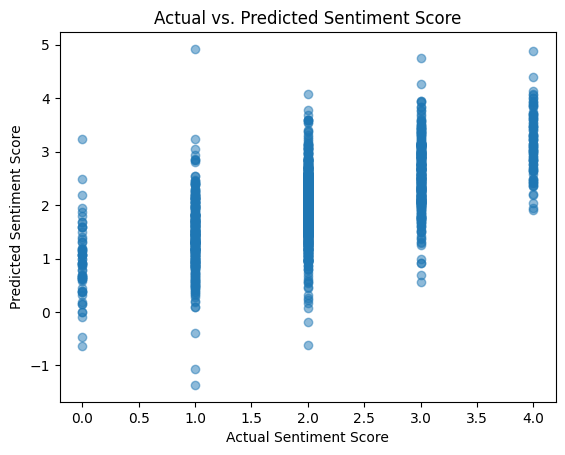

In [1476]:
# Visualizes the results
plt.scatter(y_test, y_pred, alpha=0.5)

plt.xlabel("Actual Sentiment Score") 
plt.ylabel("Predicted Sentiment Score") 
plt.title("Actual vs. Predicted Sentiment Score")

plt.show()

## <font color="red"> Discuss the resulted figure </font>

...

The scatter plot shows the actual vs. predicted sentiment scores for a model. Each dot represents an individual data point, and it appears that the model has done a fairly good job at predicting sentiment scores close to the actual ones, especially for scores around 0.5, 2.0, and 3.0 where we see a dense vertical alignment of dots. However, there is some spread around these points indicating slight errors in prediction.

In the previous section you extracted the features using sklearn built-in function. In this section you are asked to implement and create the feature matrix from scratch.

``(10 pt.)``

In [1477]:
# Code Cell
def create_feature_matrix(phrase):
    # Tokenize the phrases
    tokens = [re.split("\s+", text) for text in phrase]

    # Create a set of all unique tokens
    unique_tokens = set(token for sublist in tokens for token in sublist)

    # Initialize a matrix of zeros with dimensions (len(phrase), len(unique_tokens))
    matrix = np.zeros((len(phrase), len(unique_tokens)))

    # Create a dictionary where the key is a token and the value is its column index in the matrix
    token_index = {token: i for i, token in enumerate(unique_tokens)}

    # Populate the matrix with token counts
    for i, token_list in enumerate(tokens):
        for token in token_list:
            matrix[i][token_index[token]] += 1

    return matrix, list(unique_tokens)

In [1478]:
# Evaluation Cell
# Use the function
X_scratch, feature_words_scratch = create_feature_matrix(phrase)

# Calculate the norm difference
norm_difference = np.linalg.norm(X_scratch) - np.linalg.norm(X.toarray())

# Prints the norm difference
print(f'Norm difference: {norm_difference:.4f}')

Norm difference: 5.2236
